Normalizing the year of movie using StandardScaler

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

movies_df = pd.read_csv("movies_encoded_with_year.csv")

movies_df = movies_df.dropna(subset=['year'])

scaler = StandardScaler()
movies_df['year_scaled'] = scaler.fit_transform(movies_df[['year']])
joblib.dump(scaler, "year_scaler.pkl")


#movies_df.to_csv("cleaned_movies.csv", index=False)



['year_scaler.pkl']

In [3]:

print(movies_df[['title', 'year', 'year_scaled']].head())

                         title    year  year_scaled
0                    Toy Story  1995.0     0.022161
1                      Jumanji  1995.0     0.022161
2             Grumpier Old Men  1995.0     0.022161
3            Waiting to Exhale  1995.0     0.022161
4  Father of the Bride Part II  1995.0     0.022161


In [4]:
ratings_df = pd.read_csv("ratings_cleaned.csv")

movie_avg_rating = ratings_df.groupby("movieId")["rating"].mean().reset_index()
movie_avg_rating.rename(columns={"rating": "avg_rating"}, inplace=True)

movies_df = pd.merge(movies_df, movie_avg_rating, on="movieId", how="left")

#movies_df.to_csv("cleaned_movies.csv", index=False)



In [5]:
print(movies_df.head())

   movieId                        title    year  Action  Adventure  Animation  \
0        1                    Toy Story  1995.0       0          1          1   
1        2                      Jumanji  1995.0       0          1          0   
2        3             Grumpier Old Men  1995.0       0          0          0   
3        4            Waiting to Exhale  1995.0       0          0          0   
4        5  Father of the Bride Part II  1995.0       0          0          0   

   Children  Comedy  Crime  Documentary  ...  IMAX  Musical  Mystery  Romance  \
0         1       1      0            0  ...     0        0        0        0   
1         1       0      0            0  ...     0        0        0        0   
2         0       1      0            0  ...     0        0        0        1   
3         0       1      0            0  ...     0        0        0        1   
4         0       1      0            0  ...     0        0        0        0   

   Sci-Fi  Thriller  War  

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
movies_df["avg_rating_scaled"] = scaler.fit_transform(movies_df[["avg_rating"]])


In [7]:
print(movies_df.head())

   movieId                        title    year  Action  Adventure  Animation  \
0        1                    Toy Story  1995.0       0          1          1   
1        2                      Jumanji  1995.0       0          1          0   
2        3             Grumpier Old Men  1995.0       0          0          0   
3        4            Waiting to Exhale  1995.0       0          0          0   
4        5  Father of the Bride Part II  1995.0       0          0          0   

   Children  Comedy  Crime  Documentary  ...  Musical  Mystery  Romance  \
0         1       1      0            0  ...        0        0        0   
1         1       0      0            0  ...        0        0        0   
2         0       1      0            0  ...        0        0        1   
3         0       1      0            0  ...        0        0        1   
4         0       1      0            0  ...        0        0        0   

   Sci-Fi  Thriller  War  Western  year_scaled  avg_rating  av

In [8]:
import pandas as pd

# movies_df = pd.read_csv("cleaned_movies.csv")    
# ratings_df = pd.read_csv("filtered_ratings.csv")    

merged_df = pd.merge(ratings_df, movies_df, on="movieId", how="inner")

exclude_cols = {'movieId', 'title', 'year'} 
genre_cols = [col for col in movies_df.columns if col not in exclude_cols and movies_df[col].dropna().isin([0, 1]).all()]

avg_genre_ratings = {}

for genre in genre_cols:
    genre_movies = merged_df[merged_df[genre] == 1]
    avg_rating = genre_movies["rating"].mean()
    avg_genre_ratings[genre] = avg_rating

avg_genre_rating_df = pd.DataFrame(list(avg_genre_ratings.items()), columns=["genre", "avg_rating"])

avg_genre_rating_df.to_csv("avg_genre_rating.csv", index=False)

print("Saved genre-wise average ratings to avg_genre_rating.csv")


Saved genre-wise average ratings to avg_genre_rating.csv


In [9]:
genre_avg_df = pd.read_csv("avg_genre_rating.csv")

genre_avg_dict = dict(zip(genre_avg_df["genre"], genre_avg_df["avg_rating"]))

#movies_df=pd.read_csv("cleaned_movies.csv")
genre_cols = genre_avg_df["genre"].tolist()

movies_df["genre_score"] = movies_df[genre_cols].apply(
    lambda row: sum(row[genre] * genre_avg_dict.get(genre, 0) for genre in genre_cols), axis=1
)

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# movies_df = pd.read_csv("cleaned_movies.csv")

# movies_df = movies_df.dropna(subset=['genre_score'])

scaler = StandardScaler()
movies_df['genre_score_scaled'] = scaler.fit_transform(movies_df[['genre_score']])

In [14]:
print(movies_df.head())
movies_df.to_csv("movies_encoded_with_year.csv", index=False)


   movieId                        title    year  Action  Adventure  Animation  \
0        1                    Toy Story  1995.0       0          1          1   
1        2                      Jumanji  1995.0       0          1          0   
2        3             Grumpier Old Men  1995.0       0          0          0   
3        4            Waiting to Exhale  1995.0       0          0          0   
4        5  Father of the Bride Part II  1995.0       0          0          0   

   Children  Comedy  Crime  Documentary  ...  Romance  Sci-Fi  Thriller  War  \
0         1       1      0            0  ...        0       0         0    0   
1         1       0      0            0  ...        0       0         0    0   
2         0       1      0            0  ...        1       0         0    0   
3         0       1      0            0  ...        1       0         0    0   
4         0       1      0            0  ...        0       0         0    0   

   Western  year_scaled  avg_rat

Training the models


In [6]:
import pandas as pd
movies_df=pd.read_csv("movies_encoded_with_year.csv")
ratings_df=pd.read_csv("ratings_cleaned.csv")

In [7]:
data = pd.merge(ratings_df, movies_df, on="movieId")

In [8]:
feature_cols = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','year_scaled', 'avg_rating_scaled', 'genre_score_scaled']
X_movie = data[feature_cols].values

User Encodings

In [9]:
from sklearn.preprocessing import LabelEncoder
import joblib

user_encoder = LabelEncoder()
data["user_index"] = user_encoder.fit_transform(data["userId"])
X_user = data["user_index"].values
y = data["rating"].values

num_users = len(user_encoder.classes_)

joblib.dump(user_encoder, "user_encoder.pkl")

['user_encoder.pkl']

In [10]:
from sklearn.preprocessing import LabelEncoder
import joblib

user_encoder = LabelEncoder()
data["movie_index"] = user_encoder.fit_transform(data["movieId"])
X_movie_ids = data["movie_index"].values


num_movies = len(user_encoder.classes_)

joblib.dump(user_encoder, "movie_encoder.pkl")

['movie_encoder.pkl']

Training the main model for rating prediction

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from joblib import dump

feature_cols = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','year_scaled', 'avg_rating_scaled', 'genre_score_scaled']
X_movie_features = data[feature_cols].values
X_user_train_val, X_user_test, X_movie_id_train_val, X_movie_id_test, X_feat_train_val, X_feat_test, y_mod_train_val, y_mod_test = train_test_split(
    X_user, X_movie_ids, X_movie_features, y, test_size=0.15, random_state=42)

dump({'X_user_test': X_user_test, 'X_movie_id_test': X_movie_id_test, 'X_feat_test': X_feat_test, 'y_mod_test':y_mod_test}, "main_model_vars.joblib")

embedding_dim = 32
movie_feature_dim = len(feature_cols)

user_input = Input(shape=(1,), name="user_input")
movie_input = Input(shape=(1,), name="movie_input")
movie_features_input = Input(shape=(movie_feature_dim,), name="movie_features_input")

user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name="user_embedding", embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(user_input)
user_embedding = Flatten()(user_embedding)

movie_embedding = Embedding(input_dim=num_movies, output_dim=embedding_dim, name="movie_embedding", embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie_input)
movie_embedding = Flatten()(movie_embedding)

y_mod_train_val /=5.0

combined = Concatenate()([user_embedding, movie_embedding, movie_features_input])
x = Dense(64, activation="relu", kernel_regularizer=l2(0.0001))(combined)
x = Dropout(0.3)(x)
x = Dense(32, activation="relu", kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model = Model(inputs=[user_input, movie_input, movie_features_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss="mse", metrics=["mae"])  
history=model.fit([X_user_train_val, X_movie_id_train_val, X_feat_train_val], y_mod_train_val, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop])

model.save("main_model.keras")


Epoch 1/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0626 - mae: 0.1856 - val_loss: 0.0460 - val_mae: 0.1557
Epoch 2/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0455 - mae: 0.1543 - val_loss: 0.0378 - val_mae: 0.1389
Epoch 3/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0389 - mae: 0.1411 - val_loss: 0.0345 - val_mae: 0.1331
Epoch 4/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0356 - mae: 0.1355 - val_loss: 0.0328 - val_mae: 0.1308
Epoch 5/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0330 - mae: 0.1308 - val_loss: 0.0319 - val_mae: 0.1296
Epoch 6/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0317 - mae: 0.1287 - val_loss: 0.0313 - val_mae: 0.1288
Epoch 7/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0306 - mae: 0.1271 - val_loss: 0.0308 - val_mae: 0.1291
Epoch 8/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0301 - mae: 0.1269 - val_loss: 0.0305 - val_mae: 0.1285
Epoch 9/10
1205/1205 ━━━━━━━━━━━━━━━━━━

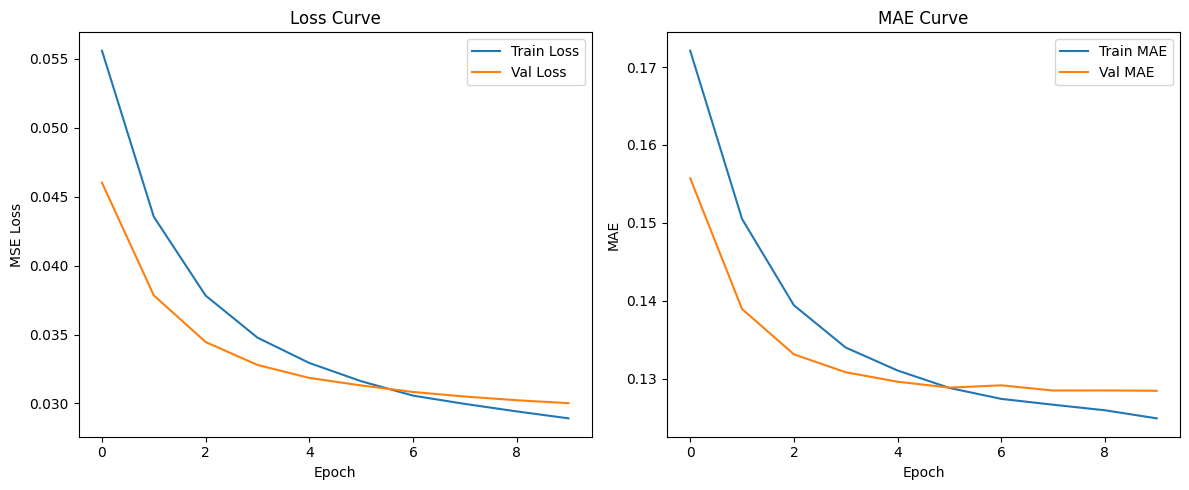

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE Curve')
plt.legend()

plt.tight_layout()
plt.show()


Training the coldstart-movie model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from joblib import dump

feature_cols = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','year_scaled']
X_movie_features = data[feature_cols].values
X_user_train_val, X_user_test, X_movie_id_train_val, X_movie_id_test, X_feat_train_val, X_feat_test, y_mod_train_val, y_mod_test = train_test_split(
    X_user, X_movie_ids, X_movie_features, y, test_size=0.15, random_state=42)

dump({'X_user_test': X_user_test, 'X_movie_id_test': X_movie_id_test, 'X_feat_test': X_feat_test, 'y_mod_test':y_mod_test}, "coldstart_movie_model_vars.joblib")

embedding_dim = 64
movie_feature_dim = len(feature_cols)

user_input = Input(shape=(1,), name="user_input")
movie_input = Input(shape=(1,), name="movie_input")
movie_features_input = Input(shape=(movie_feature_dim,), name="movie_features_input")

user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name="user_embedding", embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(user_input)
user_embedding = Flatten()(user_embedding)

y_mod_train_val /=5.0

combined = Concatenate()([user_embedding, movie_input, movie_features_input])
x = Dense(64, activation="relu")(combined)
x = Dropout(0.2)(x)
x = Dense(32, activation="relu")(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid")(x)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,            
    patience=2,             
    min_lr=1e-6,            
    verbose=1              
)


non_movie_model = Model(inputs=[user_input, movie_input, movie_features_input], outputs=output)
non_movie_model.compile(optimizer=Adam(learning_rate=0.0005), loss="mse", metrics=["mae"])  
history=non_movie_model.fit([X_user_train_val, X_movie_id_train_val, X_feat_train_val], y_mod_train_val, epochs=15, batch_size=64, validation_split=0.1, callbacks=[reduce_lr])

non_movie_model.save("coldstart_movie_model.keras")


Epoch 1/15
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1457 - mae: 0.3117 - val_loss: 0.1342 - val_mae: 0.2997 - learning_rate: 5.0000e-04
Epoch 2/15
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1325 - mae: 0.2988 - val_loss: 0.1337 - val_mae: 0.2989 - learning_rate: 5.0000e-04
Epoch 3/15
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1328 - mae: 0.2984 - val_loss: 0.1331 - val_mae: 0.2981 - learning_rate: 5.0000e-04
Epoch 4/15
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1311 - mae: 0.2961 - val_loss: 0.1326 - val_mae: 0.2975 - learning_rate: 5.0000e-04
Epoch 5/15
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1107 - mae: 0.2679 - val_loss: 0.0480 - val_mae: 0.1797 - learning_rate: 5.0000e-04
Epoch 6/15
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0459 - mae: 0.1731 - val_loss: 0.0445 - val_mae: 0.1687 - learning_rate: 5.0000e-04
Epoch 7/15
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0432 - mae: 0.1656 - val_loss: 0.0445 - val_mae:

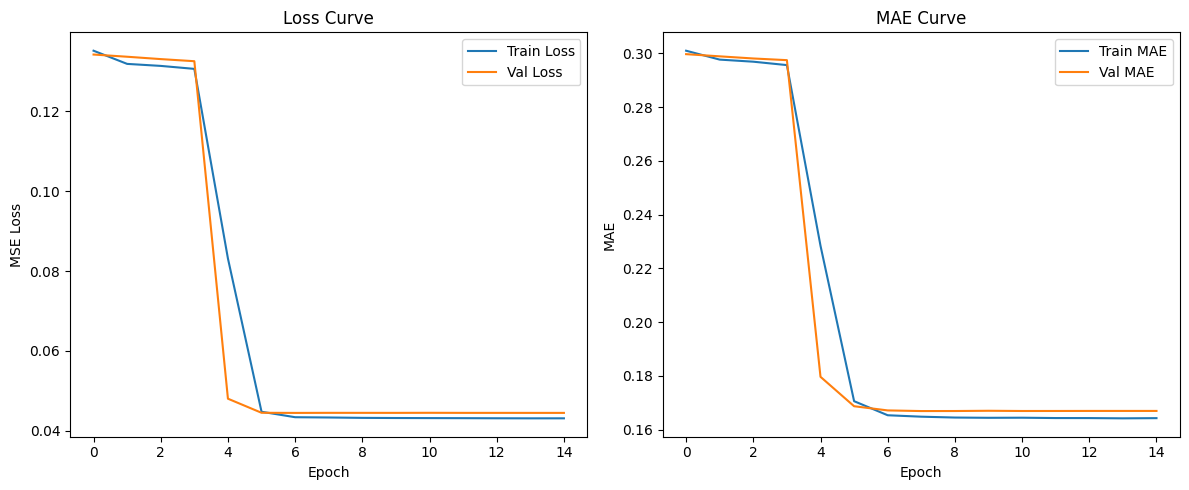

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE Curve')
plt.legend()

plt.tight_layout()
plt.show()


Training the coldstart-user model

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from joblib import dump

merged_df = pd.merge(ratings_df, movies_df, on="movieId")

movie_features = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','year_scaled']
X = merged_df[movie_features]
y = merged_df["rating"]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
dump({'X_test': X_test, 'y_test': y_test}, "coldstart_user_model_vars.joblib")

y_train_val = y_train_val / 5.0 

content_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'), 
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

content_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history=content_model.fit(X_train_val, y_train_val, epochs=20, batch_size=64, validation_split=0.1, callbacks=[early_stop])

content_model.save("coldstart_user_model.keras")


Epoch 1/20


C:\Users\HP X360 G2\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0679 - mae: 0.2180 - val_loss: 0.0428 - val_mae: 0.1655
Epoch 2/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0474 - mae: 0.1737 - val_loss: 0.0411 - val_mae: 0.1597
Epoch 3/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0456 - mae: 0.1692 - val_loss: 0.0405 - val_mae: 0.1588
Epoch 4/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0446 - mae: 0.1663 - val_loss: 0.0403 - val_mae: 0.1581
Epoch 5/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0436 - mae: 0.1650 - val_loss: 0.0402 - val_mae: 0.1578
Epoch 6/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0433 - mae: 0.1645 - val_loss: 0.0401 - val_mae: 0.1578
Epoch 7/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0433 - mae: 0.1648 - val_loss: 0.0401 - val_mae: 0.1580
Epoch 8/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0424 - mae: 0.1629 - val_loss: 0.0401 - val_mae: 0.1580
Epoch 9/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0433 

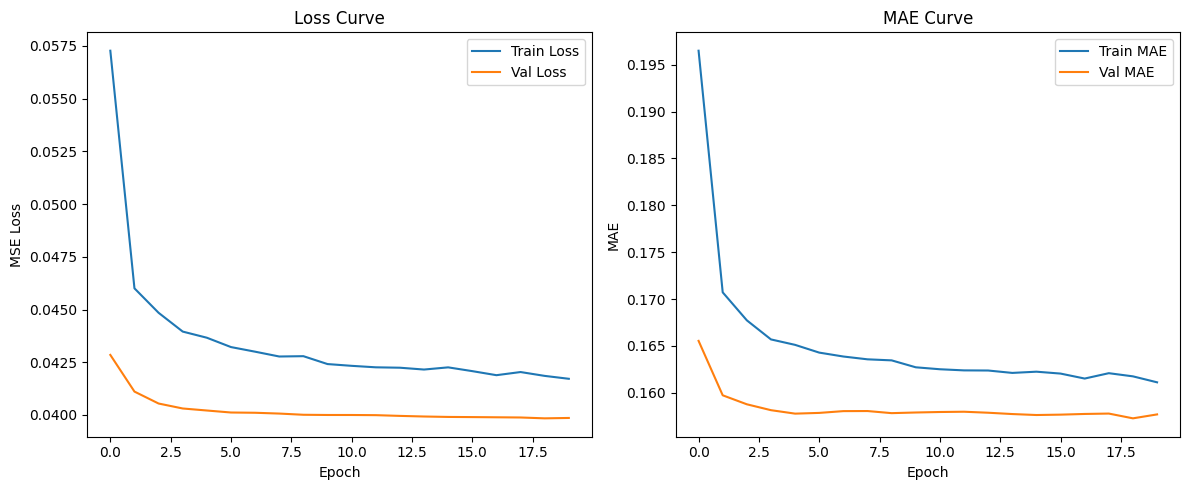

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE Curve')
plt.legend()

plt.tight_layout()
plt.show()


Prediction

In [ ]:
import numpy as np
import joblib
import pandas as pd
from tensorflow.keras.models import load_model

model = load_model("main_model.keras")
coldstart_user_model=load_model("coldstart_user_model.keras")
coldstart_movie_model=load_model("coldstart_movie_model.keras")
movies_df=pd.read_csv("movies_encoded_with_year.csv")
ratings_df=pd.read_csv("ratings_cleaned.csv")
feature_cols_1 = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western', 'year_scaled', 'avg_rating_scaled', 'genre_score_scaled']
feature_cols_2 = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western', 'year_scaled']
user_encoder = joblib.load("user_encoder.pkl")
movie_encoder = joblib.load("movie_encoder.pkl")
scaler = joblib.load("year_scaler.pkl")

def predict_rating(user_id, movie_id):
    movie_id_present=True
    if movie_id not in movies_df["movieId"].values:
        movie_id_present=False
        available_genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

        genre_input = input(f"Enter genres separated by commas (available: {', '.join(available_genres)}): ")
        selected_genres = [g.strip().title() for g in genre_input.split(',') if g.strip()]

        genre_vector = [1 if genre in selected_genres else 0 for genre in available_genres]

        try:
            year_input = int(input("Enter release year of the movie (e.g., 2005): "))
            year_scaled = scaler.transform([[year_input]])[0][0]
        except Exception as e:
            print("Invalid year input. Please enter a valid number.")
            raise

        movie_features = genre_vector + [year_scaled]

    else:
        movie_features_present = movies_df[movies_df["movieId"] == movie_id][feature_cols_1].values[0]
        movie_features_absent = movies_df[movies_df["movieId"] == movie_id][feature_cols_2].values[0]
        #movie_features_2 = movies_df[movies_df["movieId"] == movie_id][feature_cols_2].values[0]
        movie_idx = movie_encoder.transform([movie_id])[0]

    if user_id in ratings_df["userId"].values:
        user_idx = user_encoder.transform([user_id])[0]
        user_id_batch = np.array([user_idx])
        if movie_id_present:
            movie_id_batch = np.array([movie_idx])
            movie_feature_batch = np.array([movie_features_present])
            rating = model.predict([user_id_batch, movie_id_batch, movie_feature_batch])[0][0]*5.0
        else:
            movie_feature_batch = np.array([movie_features])
            movie_id_batch = np.array([movie_id])
            rating=coldstart_movie_model.predict([user_id_batch, movie_id_batch, movie_feature_batch])[0][0]*5.0
    else:
        movie_batch = np.array([movie_features_absent])
        rating = coldstart_user_model.predict(movie_batch)[0]*5.0
    return rating

print("Predicted rating:", predict_rating(1, 32)) #Example user_id and movie_id respectively

C:\Users\HP X360 G2\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
Predicted rating: 3.4982166


RMSE for main model

In [4]:
from sklearn.metrics import mean_squared_error
from joblib import load

vars = load("main_model_vars.joblib")
X_user_test = vars['X_user_test']
X_movie_id_test = vars['X_movie_id_test']
X_feat_test = vars['X_feat_test']
y_mod_test = vars['y_mod_test']
y_pred = model.predict([X_user_test, X_movie_id_test, X_feat_test])*5.0
rmse = mean_squared_error(y_mod_test, y_pred)
print("RMSE:", rmse)


473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
RMSE: 0.7040409632146847


RMSE for model for new movies

In [ ]:
from sklearn.metrics import mean_squared_error
from joblib import load

vars = load("coldstart_movie_model_vars.joblib")
X_user_test = vars['X_user_test']
X_movie_id_test = vars['X_movie_id_test']
X_feat_test = vars['X_feat_test']
y_mod_test = vars['y_mod_test']

y_pred = coldstart_movie_model.predict([X_user_test, X_movie_id_test, X_feat_test])*5.0
rmse = mean_squared_error(y_mod_test, y_pred)
print("RMSE:", rmse)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE: 1.0923617515128419


RMSE for model for new users

In [ ]:
from sklearn.metrics import mean_squared_error
from joblib import load

vars = load("coldstart_user_model_vars.joblib")
X_test = vars['X_test']
y_test = vars['y_test']

y_pred = coldstart_user_model.predict(X_test)*5.0
rmse = mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
RMSE: 1.0063575668746483
